### Perform descriptive statistics to create a customer profile for the CardioGood Fitness product lines

In [60]:
## Loading necessary packages

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import re 
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from IPython.display import Image
from sklearn import preprocessing 

In [2]:
### Loading data 
mydata = pd.read_csv('C:/Users/Pratyush Yadav/Downloads/CardioGoodFitness-1.csv')

In [3]:
mydata.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [5]:
mydata.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [9]:
mydata.describe(include='all')  #includes all categorical variables as well 

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Usage'}>,
        <AxesSubplot:title={'center':'Fitness'}>],
       [<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Miles'}>]], dtype=object)

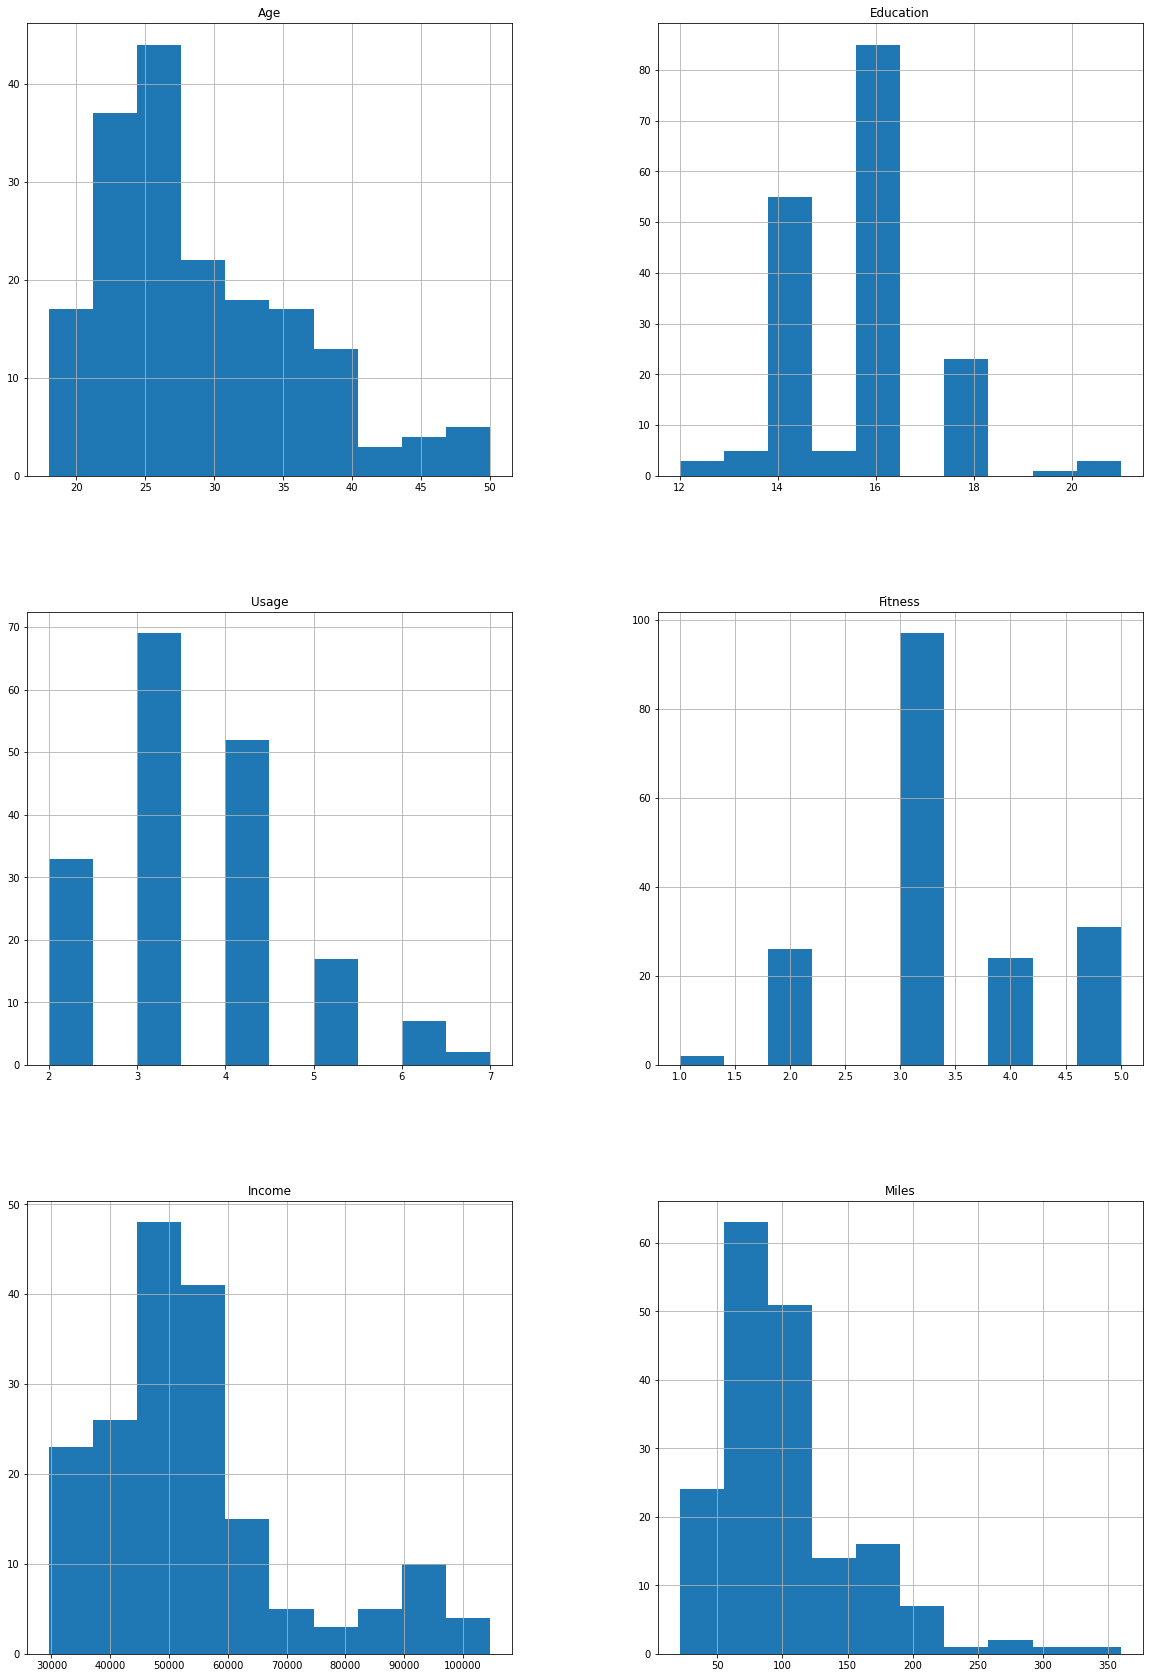

In [17]:
mydata.hist(figsize=(20,30)) 

### Customer Information based on Product lines

#### Product vs Age, Gender, Marital Status

<AxesSubplot:xlabel='Product', ylabel='Age'>

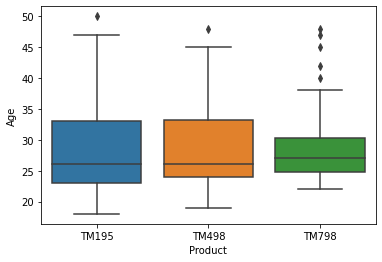

In [20]:
sns.boxplot(x='Product',y='Age',data=mydata) 

From the boxplot, we can see that the distribution of ages between the three product lines is very similar. However, it should be noticed that the variability in the ages for product TM798 is lower as compared to other two. 

<AxesSubplot:xlabel='Product', ylabel='count'>

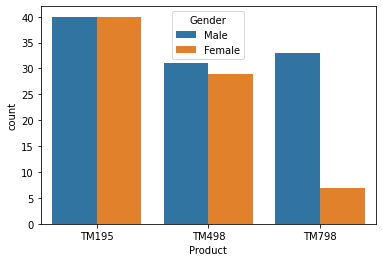

In [24]:
sns.countplot(x='Product',hue='Gender',data=mydata)

When it comes to the product lines with respect to Gender, the following can be inferred:\
a) The number of people buying TM195 are equally distributed between males and females\
b) The number of males who buy TM798 are very high compared to number of females who buy the same\
c) The number of males buying TM498 are slighly higher compared to number of females 

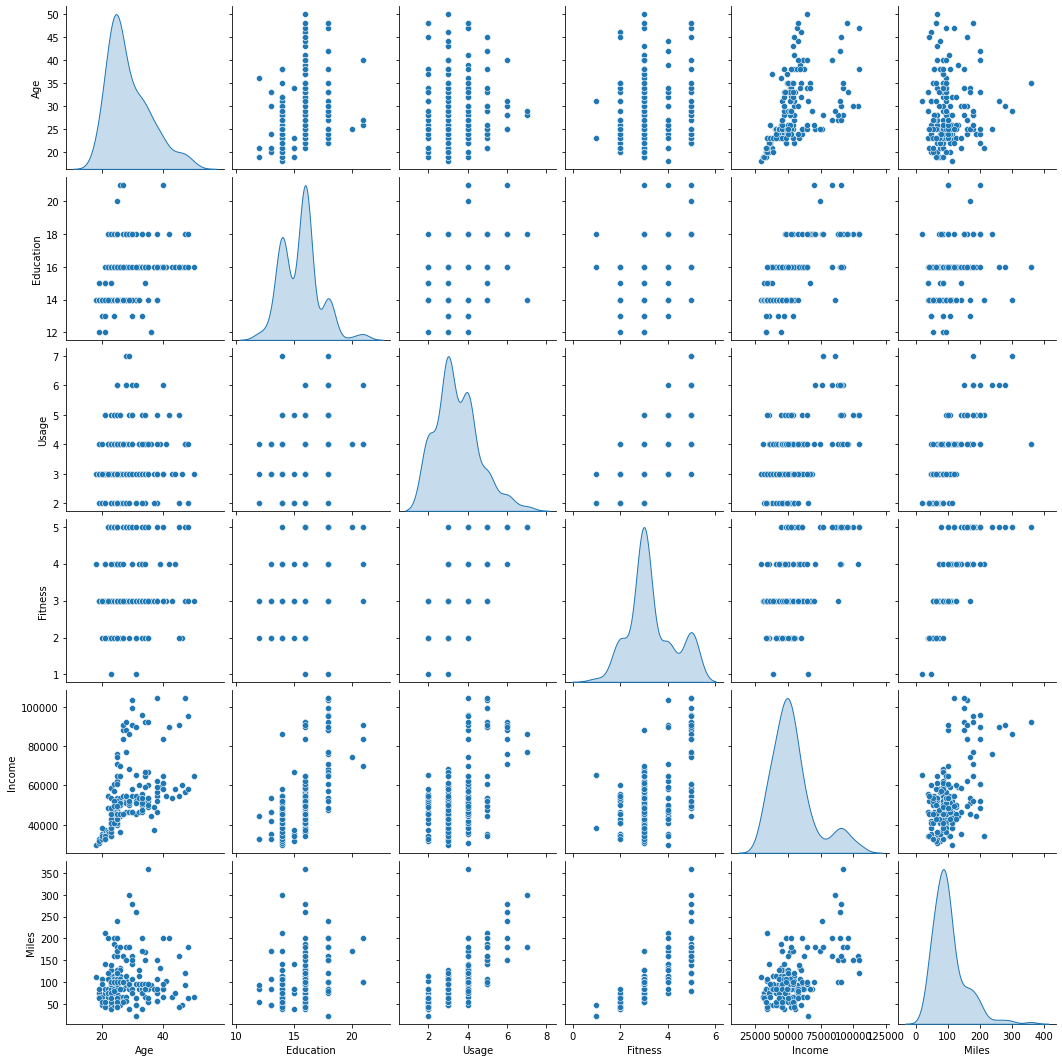

In [38]:
sns.pairplot(mydata,diag_kind='kde')

In [40]:
mydata.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<AxesSubplot:>

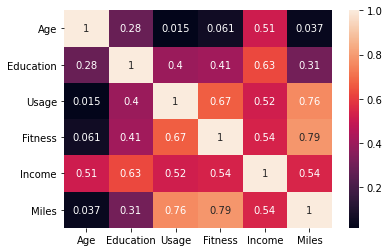

In [45]:
sns.heatmap(mydata.corr(),annot=True)

From the above plots, we can see that there are not a lot of high correlations in the data. However, certain correlations can be observed\
a) Education and Income are highly correlated which seems logical\
b) Usage levels and Miles covered are also highly correlated as expected\
c) Usage, Miles are correlated with fitness as well, which again seems logical.

Other correlations are either very low or not very significant to discuss in the following scenario. 

array([<AxesSubplot:title={'center':'Female'}>,
       <AxesSubplot:title={'center':'Male'}>], dtype=object)

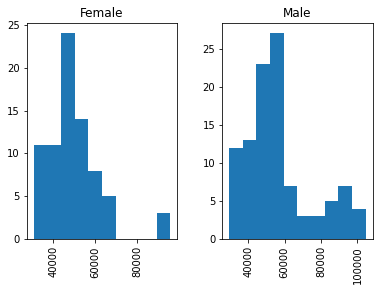

In [39]:
mydata.hist(by='Gender',column='Income')

### Fitness vs Product, Gender, Marital Status

In [80]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Fitness ~ C(Product)*C(Gender)*C(MaritalStatus)',data=mydata).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Product),78.600648,2.0,92.573178,7.902824e-28
C(Gender),0.412894,1.0,0.972586,3.254543e-01
C(MaritalStatus),0.162326,1.0,0.382365,5.371778e-01
C(Product):C(Gender),0.057581,2.0,0.067816,9.344575e-01
C(Product):C(MaritalStatus),1.802944,2.0,2.123447,1.228181e-01
C(Gender):C(MaritalStatus),1.540886,1.0,3.629607,5.846851e-02
C(Product):C(Gender):C(MaritalStatus),0.634492,2.0,0.747284,4.752192e-01
Residual,71.321462,168.0,NaN,NaN


In [90]:
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

stats.f_oneway(mydata[mydata['Product']=='TM195']['Fitness'],mydata[mydata['Product']=='TM498']['Fitness'],
              mydata[mydata['Product']=='TM798']['Fitness'])

F_onewayResult(statistic=104.00134919323754, pvalue=1.3554706834328812e-30)

In [91]:
MultiComp = MultiComparison(mydata['Fitness'],
                            mydata['Product'])

In [92]:
MultiComp.tukeyhsd().summary()

group1,group2,meandiff,p-adj,lower,upper,reject
TM195,TM498,-0.0625,0.8243,-0.3264,0.2014,False
TM195,TM798,1.6625,0.001,1.3632,1.9618,True
TM498,TM798,1.725,0.001,1.4095,2.0405,True


### Miles vs Product Lines

In [87]:
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

stats.f_oneway(mydata[mydata['Product']=='TM195']['Miles'],mydata[mydata['Product']=='TM498']['Miles'],
              mydata[mydata['Product']=='TM798']['Miles'])

F_onewayResult(statistic=68.24179605090241, pvalue=1.0730574762130848e-22)

In [88]:
MultiComp = MultiComparison(mydata['Miles'],
                            mydata['Product'])

In [89]:
MultiComp.tukeyhsd().summary()

group1,group2,meandiff,p-adj,lower,upper,reject
TM195,TM498,5.1458,0.7048,-10.675,20.9667,False
TM195,TM798,84.1125,0.001,66.1733,102.0517,True
TM498,TM798,78.9667,0.001,60.0571,97.8762,True


### Income vs Product Types

In [102]:
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

stats.f_oneway(mydata[mydata['Product']=='TM195']['Income'],mydata[mydata['Product']=='TM498']['Income'],
              mydata[mydata['Product']=='TM798']['Income'])

F_onewayResult(statistic=89.25903546601671, pvalue=1.5644991316342494e-27)

In [103]:
MultiComp = MultiComparison(mydata['Income'],
                            mydata['Product'])

In [104]:
MultiComp.tukeyhsd().summary()

group1,group2,meandiff,p-adj,lower,upper,reject
TM195,TM498,2555.625,0.4113,-2172.6586,7283.9086,False
TM195,TM798,29023.55,0.001,23662.1803,34384.9197,True
TM498,TM798,26467.925,0.001,20816.5451,32119.3049,True


### Overall Summary with respect to Product, Gender, Marital Status

In [37]:
pd.pivot_table(mydata, index=['Product','Gender'], columns=['MaritalStatus'],aggfunc=np.mean)

Age             Education              Fitness  \
MaritalStatus   Partnered     Single  Partnered     Single Partnered   
Product Gender                                                         
TM195   Female  28.333333  28.692308  14.888889  15.538462  2.851852   
        Male    31.380952  25.631579  15.428571  14.473684  2.857143   
TM498   Female  30.000000  28.142857  15.200000  15.214286  2.933333   
        Male    30.380952  25.200000  15.285714  14.500000  2.904762   
TM798   Female  29.000000  24.333333  17.500000  18.333333  5.000000   
        Male    30.000000  28.928571  17.421053  16.928571  4.631579   

                                Income                     Miles              \
MaritalStatus     Single     Partnered        Single   Partnered      Single   
Product Gender                                                                 
TM195   Female  2.923077  46153.777778  45742.384615   74.925926   78.846154   
        Male    3.263158  50028.000000  43265.842105   80.190476   99.526316   
TM498   Female  2.785714  49724.800000  48920.357143   94.000000   80.214286   
        Male    3.000000  49378.285714  47071.800000   87.238095   91.100000   
TM798   Female  4.000000  84972.250000  58516.000000  215.000000  133.333333   
        Male    4.642857  81431.368421  68216.428571  176.315789  147.571429   

                   Usage            
MaritalStatus  Partnered    Single  
Product Gender                      
TM195   Female  2.851852  3.000000  
        Male    3.285714  3.263158  
TM498   Female  3.333333  2.928571  
        Male    2.857143  3.300000  
TM798   Female  5.250000  4.666667  
        Male    4.842105  4.571429

The above table summarizes the overall values of age, education, fitness rating, incomes, miles, usage with respect to different product types, gender and marital status. From the pivot table, a few inferences can be drawn. 

a) We can see that the fitness rating scale on an average is higher for TM798 as compared to TM195 and TM498. The difference between TM195 and TM498 however is not significant. This can also be verified by ANOVA and post-hoc tests. Other factors like Gender and MaritalStatus do not have a significant difference which can be verified through ANOVA testing (p>0.05)

b) With respect to age, , there is no significant difference between product types. 

c) From the table, it can be inferred that between TM195 and TM498, there is no significant difference between usage, miles, income and fitness ratings. However, the values for TM798 are significantly different from the other two product lines. 

Hence it is safe to say the following:\
i) People with higher incomes prefer to buy TM798, while there is no difference between the income groups of TM195 and TM498\
ii) People who buy TM798 tend to be more on the fit side compared to people on the other models. \
iii) People who buy TM798 tend to use the model more often and cover more miles compared to the other two models.

For the other two product lines, it is difficult to say which customer demographic variable is more prominent for them as all of them have an insignificant difference between the product lines. Hence, more data on demography would be required to add more information to make conclusive decisions. In addition, a clustering technique on the customers would enable to get more insights on their purchase patterns and the product lines. 